# Introducción a Jupyter Notebooks

## Markdown: https://www.markdownguide.org/
### Heading 3
#### Heading 4
##### Heading 5

Dar *énfasis* o **super énfasis.**

Escribir listas:
- 1
- 2
- 3

1. a
2. b
3. c
4. d

## Manipulación de celdas
- Correr celda: `shift+enter` o `ctrl+enter`
- Agregar celdas: `a` (above), `b` (below)
- Borrar celda: `dd` (delete)
- Convertir celda en Markdown: `m`
- Convertir celda en código: `y`

In [1]:
1 + 1

2

In [2]:
resultado = 2*8

In [3]:
# Podemos imprimir variables
resultado

16

In [4]:
print("Hello world.")

Hello world.


In [5]:
hello_word = "Hello world."

In [6]:
hello_word

'Hello world.'

# Librerías

In [7]:
# Manipulación de datos
import pandas as pd

# Manipulación de arreglos y matrices
import numpy as np

# Visualización
import matplotlib.pyplot as plt

# 1. ¿Qué vamos a hacer?

Como científicos de datos, nos están solicitando diseñar un modelo de pronostique el rendimiento de combustible en mpg para automóviles.
- Rendimiento de combustible en mpg → valor numerérico → regresión

Para esto, nos proporcionaron un dataset del UC Irvine Machine Learning Repository desponible en: http://archive.ics.uci.edu/dataset/9/auto+mpg.

Este contiene los siguientes atributos:

**Predictors:**

1. **mpg:**           continuous
2. **cylinders:**     multi-valued discrete
3. **displacement:**  continuous
4. **horsepower:**    continuous
5. **weight:**        continuous
6. **acceleration:**  continuous
7. **model year:**    multi-valued discrete
8. **origin:**        multi-valued discrete
9. **car name:**      string (unique for each instance)

# 2. ¿Qué datos vamos a utilizar?
Ahora, vamos a leer el dataset e iniciar una breve exploración.

Los datos se encuentran en un archivo csv llamado **`autom-mgp.csv`**.

In [8]:
# Podemos usar pandas para leer los datos y guardarlos en un dataframe llamado
# "auto_mpg_df"
auto_mpg_df = pd.read_csv('data/auto-mpg.csv')

## Ahora, revisa los datos
- **`.head()`** nos permite visualizar los primeros 5 registros del dataframe.

In [9]:
auto_mpg_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


- **`.info()`** nos permite revisar los detalles de cada atributo, como:
    - nombre de cada columna/atributo
    - número de registros no vacíos
    - tipo de dato

In [10]:
auto_mpg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 28.1+ KB


In [11]:
#auto_mpg_df[auto_mpg_df.isnull().any(axis=1)]

- **`.describe()`** nos permite obtener las estadísticas descriptivas de los atributos numéricos, como:
    - cantidad de registros
    - promedio
    - desviación estándar
    - valor mínimo
    - cuartiles
    - valor máximo

In [12]:
auto_mpg_df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


## Y visualiza los datos
- Con una serie de histogramas, podemos visualizar la distribución de cada atributo.

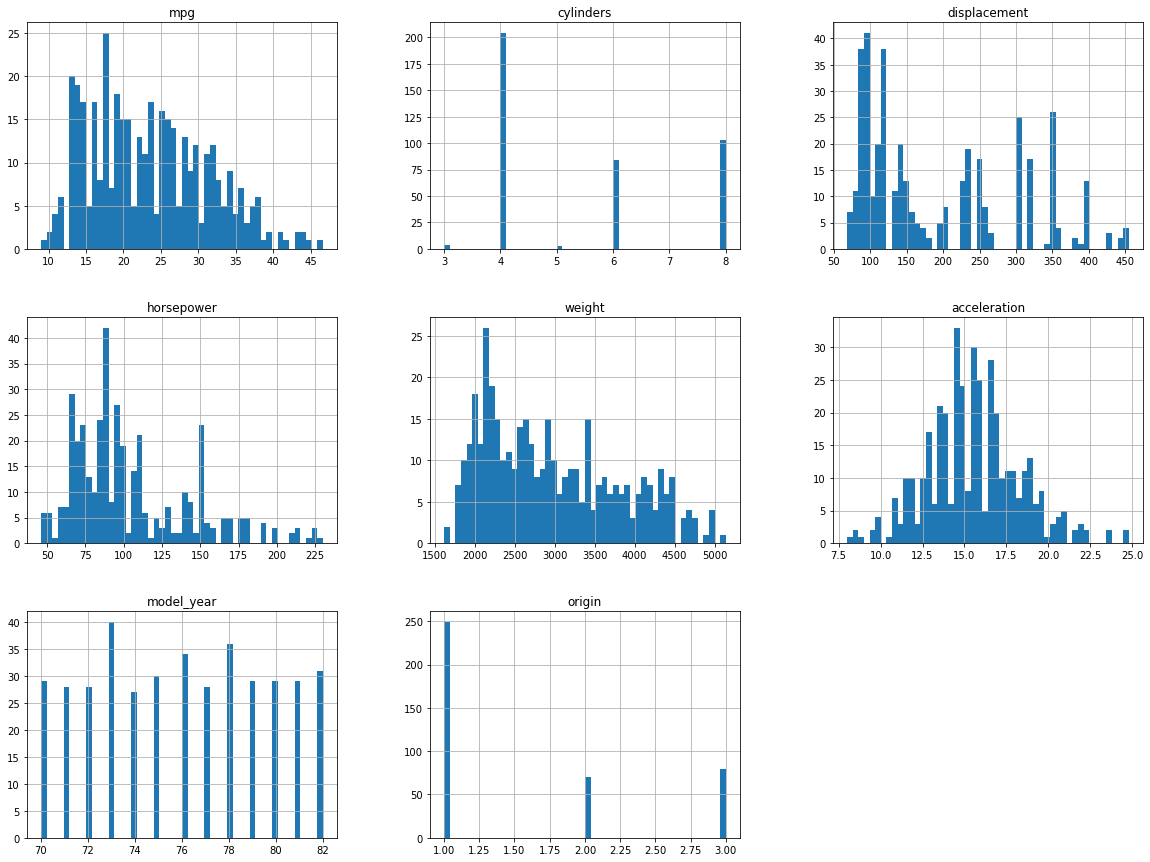

In [13]:
auto_mpg_df.hist(bins=50, figsize=(20,15))
plt.show()

## Finalmente, separa los datos en sets de entrenamiento y evaluación
- Es importante sólo trabajar con los datos de entrenamiento, y dejar a un lado el set de evaluación: esto evitará sesgar tu análisis -- data snooping bias.
- Para esto, podemos importar la función **`train_test_split`** de la librería de Machine Learning **`scikit-learn`**.
- **`train_test_split`** nos permitirá dividir **`auto_mpg_df`** en un set de entrenamiento (**`train_set`**) y evaluación (**`test_set`**), a un razón 80:20.

In [14]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(auto_mpg_df, test_size=0.2, random_state=42)

Y finalmente, podemos explorar las diferencias entre los dos datasets, así como su cantidad de registros.

In [15]:
train_set.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
18,27.0,4,97.0,88.0,2130.0,14.5,70,3,datsun pl510
376,37.0,4,91.0,68.0,2025.0,18.2,82,3,mazda glc custom l
248,36.1,4,91.0,60.0,1800.0,16.4,78,3,honda civic cvcc
177,23.0,4,115.0,95.0,2694.0,15.0,75,2,audi 100ls


In [16]:
test_set.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
198,33.0,4,91.0,53.0,1795.0,17.4,76,3,honda civic
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,ford ranger
33,19.0,6,232.0,100.0,2634.0,13.0,71,1,amc gremlin
208,13.0,8,318.0,150.0,3940.0,13.2,76,1,plymouth volare premier v8
93,14.0,8,318.0,150.0,4237.0,14.5,73,1,plymouth fury gran sedan


Tenemos muchos más datos disponibles en el set de entrenamiento...

In [17]:
print("train: ", len(train_set), "; test: ", len(test_set))

train:  318 ; test:  80


# 3. Visualiza y explora los datos para obtener insights
- A partir de -las siguientes celdas, vamos a analizar solamente los datos de entrenamiento, para encontrar relaciones interesantes entre nuestros atributos que nos ayuden a pronosticar **`mpg`**.
- Iniciaremos obteniendo una matriz de correlaciones:

In [18]:
corr_matrix = train_set.corr()

In [19]:
corr_matrix

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
mpg,1.000000,-0.770459,-0.801543,-0.772308,-0.827333,0.390101,0.586743,0.562710
cylinders,-0.770459,1.000000,0.951825,0.839187,0.893808,-0.479743,-0.372146,-0.562782
displacement,-0.801543,0.951825,1.000000,0.888972,0.929479,-0.512604,-0.384505,-0.620072
horsepower,-0.772308,0.839187,0.888972,1.000000,0.855325,-0.672726,-0.430757,-0.451938
weight,-0.827333,0.893808,0.929479,0.855325,1.000000,-0.380938,-0.313227,-0.585384
acceleration,0.390101,-0.479743,-0.512604,-0.672726,-0.380938,1.000000,0.286697,0.203643
model_year,0.586743,-0.372146,-0.384505,-0.430757,-0.313227,0.286697,1.000000,0.198992
origin,0.562710,-0.562782,-0.620072,-0.451938,-0.585384,0.203643,0.198992,1.000000


- Seleccionando solo el atributo **`mpg`** (nuestra variable dependiente), podemos ordernar de acuerdo a su correlación con otros atributos.
- ¿Qué atributos están más correlacionados con **`mpg`**? 

In [20]:
corr_matrix['mpg'].sort_values(ascending=False)

mpg             1.000000
model_year      0.586743
origin          0.562710
acceleration    0.390101
cylinders      -0.770459
horsepower     -0.772308
displacement   -0.801543
weight         -0.827333
Name: mpg, dtype: float64

- También podemos visualizar ese comportamiento usando la librería **`seaborn`** y su función **`pairplots`**.

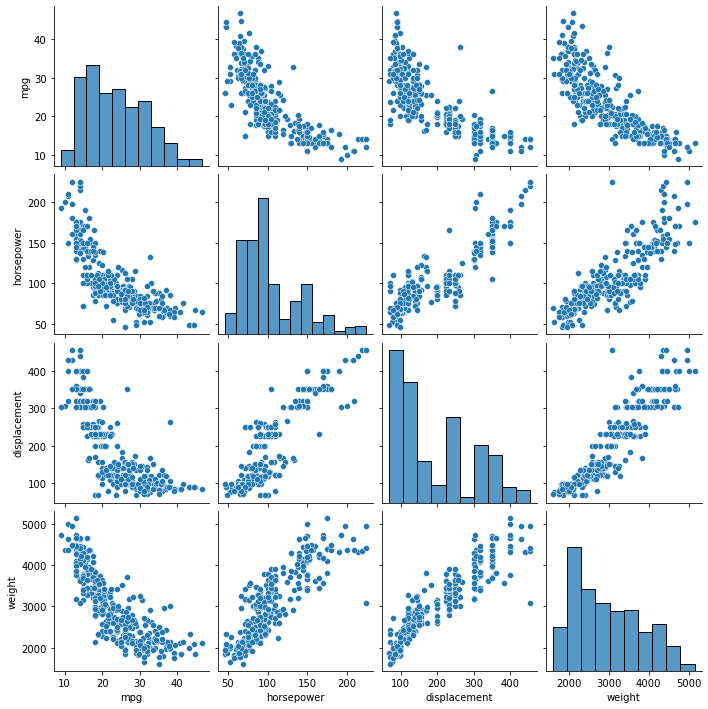

In [21]:
# Librería de visualización de datos
import seaborn as sns

# Principales atributos a analizar
attributes = ['mpg', 'horsepower', 'displacement', 'weight']

# Corremos la función:
sns.pairplot(train_set[attributes])

# 4. Debemos preparar los datos para usar Machine Learning
- Para esto, primero separamos nuestras variables indipendientes (X) de nuestra variable dependiente (y): **`mpg`**.

In [22]:
X = train_set.drop('mpg', axis=1)
y = train_set[['mpg']].copy()

- Podemos visualizar nuestros dos nuevos dataframes:

In [23]:
X.head()

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
3,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
18,4,97.0,88.0,2130.0,14.5,70,3,datsun pl510
376,4,91.0,68.0,2025.0,18.2,82,3,mazda glc custom l
248,4,91.0,60.0,1800.0,16.4,78,3,honda civic cvcc
177,4,115.0,95.0,2694.0,15.0,75,2,audi 100ls


In [24]:
y.head()

,mpg
3,16.0
18,27.0
376,37.0
248,36.1
177,23.0


## Ahora, sigue limpiar los datos

- No nos interesa el nombre del carro, ya que es una variable categórica y los algoritmos de Machine Learning sólo aceptan inputs numéricos.
- En nuestro caso, vamos a eliminar esta columna.
- Existen formas de convertir atributos categóricos en valores numéricos, pero están fuera del alcance de esta demostración.

In [25]:
X = X.drop('car_name', axis=1)

- Adicionalmente, debemos evitar los valores vacíos del dataset.
- Podemos tumbar los registros, elminar el atributo o rellenarlos.
- Nosotros decidimos rellenarlos con su mediana, utilizan la clase **`SimpleImputer`** de **`scikit-learn`**.

In [26]:
# Importamos SimpleImputer
from sklearn.impute import SimpleImputer

# Inicializas "imputer"
imputer = SimpleImputer(strategy='median')

# Lo entrenas con los datos - permitas que se "ajuste", aprendiendo las medianas de cada atributo
imputer.fit(X)

SimpleImputer(strategy='median')

- Podemos imprimir los valores de las medianas de cada atributo, captados por **`imputer`**.

In [27]:
imputer.statistics_

array([4.0000e+00, 1.4850e+02, 9.2000e+01, 2.8225e+03, 1.5500e+01,
       7.6000e+01, 1.0000e+00])

- Estos valores coinciden con obtener las medianas vía python.

In [28]:
X.median().values

array([4.0000e+00, 1.4850e+02, 9.2000e+01, 2.8225e+03, 1.5500e+01,
       7.6000e+01, 1.0000e+00])

- Finalmente, **transformamos** nuestro dataset **`X`**, rellenando esos valores vacíos con las medianas.
- Ahora, se llama **`X_tr`**.

In [29]:
X_tr = imputer.transform(X)

- Sin embargo, queda como una matriz medio fea:

In [30]:
X_tr

array([[  8. , 304. , 150. , ...,  12. ,  70. ,   1. ],
       [  4. ,  97. ,  88. , ...,  14.5,  70. ,   3. ],
       [  4. ,  91. ,  68. , ...,  18.2,  82. ,   3. ],
       ...,
       [  4. , 134. ,  95. , ...,  14.8,  78. ,   3. ],
       [  4. ,  89. ,  62. , ...,  17.3,  81. ,   3. ],
       [  4. ,  97. ,  46. , ...,  21. ,  73. ,   2. ]])

- Podemos regresarlo a un DataFrame de pandas llamado **`X_imputed`** de la siguiente manera:

In [31]:
X_imputed = pd.DataFrame(X_tr, columns=X.columns, index=X.index)

- Para validar si realmente funcionó, solo tenemos que contar los datos nulos de nuestro dataset original (**`X`**) y nuestro dataset imputado (**`X_tr`**):

In [32]:
X.isnull().sum()

cylinders       0
displacement    0
horsepower      5
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

In [33]:
X_imputed.isnull().sum()

cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

## Feature Scaling
- Otro punto importante de la prepación de los datos es normalizar los datos para que estén en una misma escala.
- Algunos algoritmos de Machine Learning no funcionan de la mejor manera cuando la escala de sus inputs es muy diferente.
- Existen varias opciones, pero nosotros vamos a escalar los datos usando estandarización:
$$
  z = \frac{x-\mu}{\theta}
$$
- Para esto, vamos a importar **`StandardScaler`** de **`scikit-learn`**.

In [34]:
# Importamos StandardScaler
from sklearn.preprocessing import StandardScaler

# Inicializas "scaler"
scaler = StandardScaler()

# Lo entrenas con los datos - permitas que se "ajuste", aprendiendo la media y desviación estándar
scaler.fit(X_imputed)

StandardScaler()

- Como arriba, ahora **transformamos** nuestro dataset **`X_imputed`**, escalando los datos.

In [35]:
X_scaled = scaler.transform(X_imputed)

- Igual, podemos convertirlo en pandas DataFrame:

In [36]:
X_prepared = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)

- Y comparar los datos originales con los preparados
- ¿Observan la diferencia?

In [37]:
X.head()

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
3,8,304.0,150.0,3433.0,12.0,70,1
18,4,97.0,88.0,2130.0,14.5,70,3
376,4,91.0,68.0,2025.0,18.2,82,3
248,4,91.0,60.0,1800.0,16.4,78,3
177,4,115.0,95.0,2694.0,15.0,75,2


In [38]:
X_prepared.head()

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
3,1.527188,1.090196,1.266232,0.552826,-1.319334,-1.696667,-0.729494
18,-0.850515,-0.922996,-0.407925,-0.999667,-0.413182,-1.696667,1.738368
376,-0.850515,-0.981350,-0.947975,-1.124772,0.927922,1.638975,1.738368
248,-0.850515,-0.981350,-1.163996,-1.392854,0.275493,0.527094,1.738368
177,-0.850515,-0.747936,-0.218907,-0.327675,-0.231952,-0.306816,0.504437


# 5. Esto es lo divertido: Selecciona y entrena tu modelo
- Existen diversos modelos de regresión múltiple que podemos utilizar.
- Para este ejemplo, iniciaremos con una simple regresión lineal, importando **`LinearRegression`** de **`scikit-learn`**.

In [39]:
# Importa LinearRegression
from sklearn.linear_model import LinearRegression

# Inicializa el modelo como "lin_reg"
lin_reg = LinearRegression()

# Entrenas el modelo con los datos - permites que se "ajuste" a tus inputs y variables objetivo
# El modelo aprende de los datos disponibles, y determina cómo se comportan
lin_reg.fit(X_prepared, y)

LinearRegression()

- Ahora podemos **pronosticar** mpg a partir de ciertos inputs:

In [40]:
# Guarda la predicción en "y_preds" llamando .predict()
y_preds = lin_reg.predict(X_prepared)

- Como sabemos su valor real, podemos compararlo con el pronóstico y ver qué tan bien quedó.

In [41]:
comparison_df = pd.DataFrame({
    'Predicted Values': pd.DataFrame(y_preds)[0],
    'Actual Values': y['mpg'].values
})

In [42]:
comparison_df

,Predicted Values,Actual Values
0,15.165209,16.0
1,25.276885,27.0
2,35.955334,37.0
3,34.277943,36.1
4,24.320455,23.0
...,...,...
313,25.101955,19.0
314,10.650276,12.0
315,29.493068,21.1
316,34.982507,37.7


### Evaluación
- Finalmente, podemos evaluar su comportamiento.
- Para este caso, utilizamos el RMSE, importando **`mean_squared_error`** de **`scikit-learn`**.

In [43]:
# Importa mean_squared_error
from sklearn.metrics import mean_squared_error

# Calcula el rmse, metiendo los valores reales (y) y el pronóstico (y_preds) a la función
rmse = mean_squared_error(y, y_preds, squared=False)

print(f"El RMSE de regresión lineal es de: {rmse} mpg.")

El RMSE de regresión lineal es de: 3.414648957644513 mpg.


- ¿Qué significa este valor? ¿Consideras que es un buen desempeño?

# Sigues tu! Entrena los siguientes modelos:
1. Reemplaza los guiones bajos ___ con el código necesario para entrenar cada uno de los tres modelos.
2. Cuando termines, selecciona el modelo que tiene el mejor comportamiento.

## 1. Árbol de Decisión para Regresión

In [185]:
# Importa DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

# Inicializa el modelo como "tree_reg"
tree_reg = DecisionTreeRegressor()

# Entrena el modelo con los datos X y y correspondientes...
tree_reg.___(___, ___)

# Pronostica el mpg para los valores de X correspondientes...
y_preds_tree = tree_reg.___(___)

# Pronostica el mpg para los valores de X correspondientes...
rmse_tree = mean_squared_error(___, ___, squared=False)

print(f"El RMSE de un árbol de decisión es: {rmse_tree} mpg.")

0.0


## 2. Random Forests para Regresión

In [186]:
# Importa RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

# Inicializa el modelo como "forest_reg"
forest_reg = RandomForestRegressor()

# Entrena el modelo con los datos X y y correspondientes...
forest_reg.fit(X_prepared, y)

# Pronostica el mpg para los valores de X correspondientes...
y_preds_forest = forest_reg.___(___)

# Pronostica el mpg para los valores de X correspondientes...
rmse_forest = mean_squared_error(___, ___, squared=False)

print(f"El RMSE de Random Forests es: {rmse_forest} mpg.")

1.0791735117919916


C:\Users\luisc\AppData\Local\Temp/ipykernel_7700/2594307835.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_reg.fit(X_prepared, y)


## 3. Y finalmente evalúa el mejor modelo con los datos de evaluación
- Recuerdas que dejamos un set de evaluación que prometimos nunca tocar? Ahora es el momento...
- Ahora vamos a evaluar el modelo con el test_set, datos que nuestro algoritmo nunca ha visto.
- Por eso mismo, es probable que los resultados del RMSE sean bastante diferentes...

### Antes, debemos de preparar los datos de evaluación
- Esto ya lo hice por ti -- debemos asegurarnos de que no existan datos vacíos, y que estén en la misma escala, para que el modelo funcione.
- Solo debes correr la celda.

In [192]:
# Seleccionar X_test y y_test del nuestro test_set
X_test = test_set.drop('mpg', axis=1)
y_test = test_set[['mpg']].copy()

# Tumbamos "car_name"
X_test = X_test.drop('car_name', axis=1)
# Rellenamos datos vacíos con su mediana.
X_test = imputer.transform(X_test)
# Escalamos los datos.
X_test = scaler.transform(X_test)

C:\Users\luisc\anaconda3\envs\HOML_env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


### Finalmente, podemos predicir
- Solo reemplaza el espacio en blanco con el mejor modelo: lin_reg, tree_reg o forest_reg

In [197]:
# "final_model" será tu mejor modelo.
final_model = ___

# Pronosticamos sobre "X_test" (recuerda que el modelo ya fue entrenado)
y_preds_final = final_model.predict(X_test)

# Y finalmente medimos el error contra "y_test"
rmse_final = mean_squared_error(y_test, y_preds_final, squared=False)

print(f"El RMSE del modelo final es: {rmse_final} mpg.")

C:\Users\luisc\anaconda3\envs\HOML_env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
